<a href="https://colab.research.google.com/github/Syeda-Tazneen/skills_development/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective of the Model is to predict the Price of Flight

In [ ]:
# Importing Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [ ]:
flight_price=pd.read_excel('C://Users//Syeda Tazneen//Desktop//Datasets_final//Flight_Price_Train.xlsx')

In [ ]:
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
flight_price_test=pd.read_excel('C://Users//Syeda Tazneen//Desktop//Datasets_final//Flight_Price_Test.xlsx')

In [ ]:
flight_price_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


## We Merged the train and test data

In [ ]:
flight_price['data']='train'
flight_price_test['data']='test'

In [ ]:
flight_price=pd.concat([flight_price,flight_price_test])

In [ ]:
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


# Feature Engineering

In [ ]:
# Checking the dimentionality of the Data
flight_price.shape

(13354, 12)

In [ ]:
# Understanding Statistical Calculations of the Dataset on categorical_variable
categorical_variable=['Airline','Source','Destination']

In [ ]:
flight_price[categorical_variable].describe().T

,count,unique,top,freq
Airline,13354,12,Jet Airways,4746
Source,13354,5,Delhi,5682
Destination,13354,6,Cochin,5682


In [ ]:
# Understanding Statistical Calculations of the Dataset on Numeric Variable
flight_price.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# Checking the DataType of each Features
flight_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  data             13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [ ]:
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data,year,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170.0,non-stop,No info,3897.0,train,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445.0,2 stops,No info,7662.0,train,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140.0,2 stops,No info,13882.0,train,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325.0,1 stop,No info,6218.0,train,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285.0,1 stop,No info,13302.0,train,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1435.0,1 stop,No info,NaN,test,2019,6,6
13104,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,155.0,non-stop,No info,NaN,test,2019,3,27
13105,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,395.0,1 stop,No info,NaN,test,2019,6,3
13106,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,915.0,1 stop,No info,NaN,test,2019,6,3


In [ ]:
# check Duplicates
flight_price.duplicated().sum()

246

In [ ]:
# Removing Duplicates
flight_price=flight_price.drop_duplicates(ignore_index=True)

In [ ]:
flight_price.duplicated().sum()

0

In [ ]:
# Missing Value
flight_price.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2645
data                  0
dtype: int64

In [ ]:
import missingno as msno

<Axes: >

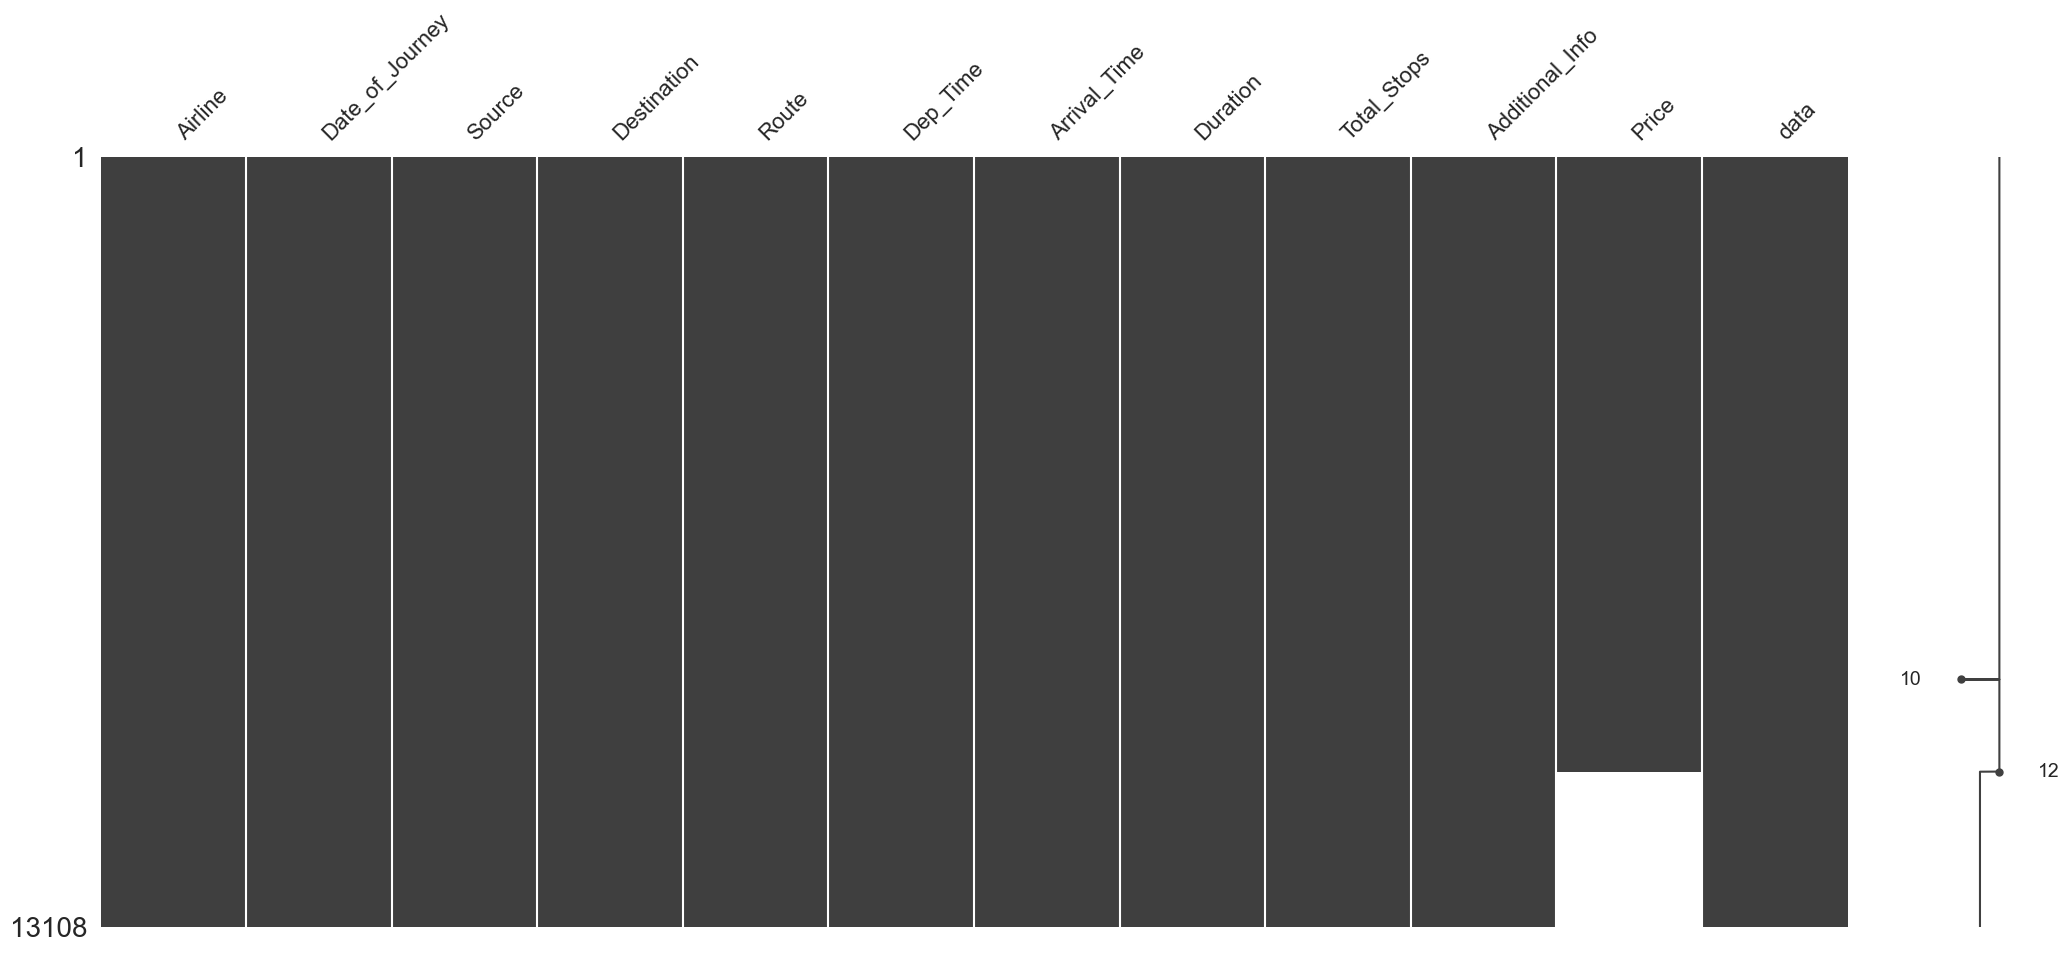

In [ ]:
missing=msno.matrix(flight_price)
missing

In [ ]:
# We will Drop Missing Value as it is only 1
flight_price=flight_price.dropna(subset=['Route'],axis=0)

In [ ]:
flight_price.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2645
data                  0
dtype: int64

In [ ]:
#  Extracting Date, Month, Year from Date of Journey column
import datetime as dt

In [ ]:
# change the datatype of the column 'Date_of_Journey'
flight_price['Date_of_Journey']=pd.to_datetime(flight_price['Date_of_Journey'])

# Extract Year


In [ ]:
flight_price['year']=flight_price['Date_of_Journey'].dt.year


In [ ]:
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2019
13104,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2019
13105,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2019
13106,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2019


# Extract Month

In [ ]:
flight_price['Month']=flight_price['Date_of_Journey'].dt.month
# (If we want the name of the month we can use month_name())

In [ ]:
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data,year,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2019,6
13104,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2019,3
13105,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2019,6
13106,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2019,6


In [ ]:
# Extract Day
flight_price['Day']=flight_price['Date_of_Journey'].dt.day
#(if we want name of the day we can go with day_name())

In [ ]:
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data,year,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2019,6,6
13104,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2019,3,27
13105,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2019,6,3
13106,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2019,6,3


# Perform Exploratory Data Analysis (EDA) tasks

# a) Which airline is most preferred airline

In [ ]:
flight_price['Airline'].value_counts()

Jet Airways                          4586
IndiGo                               2552
Air India                            2126
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               607
Air Asia                              405
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

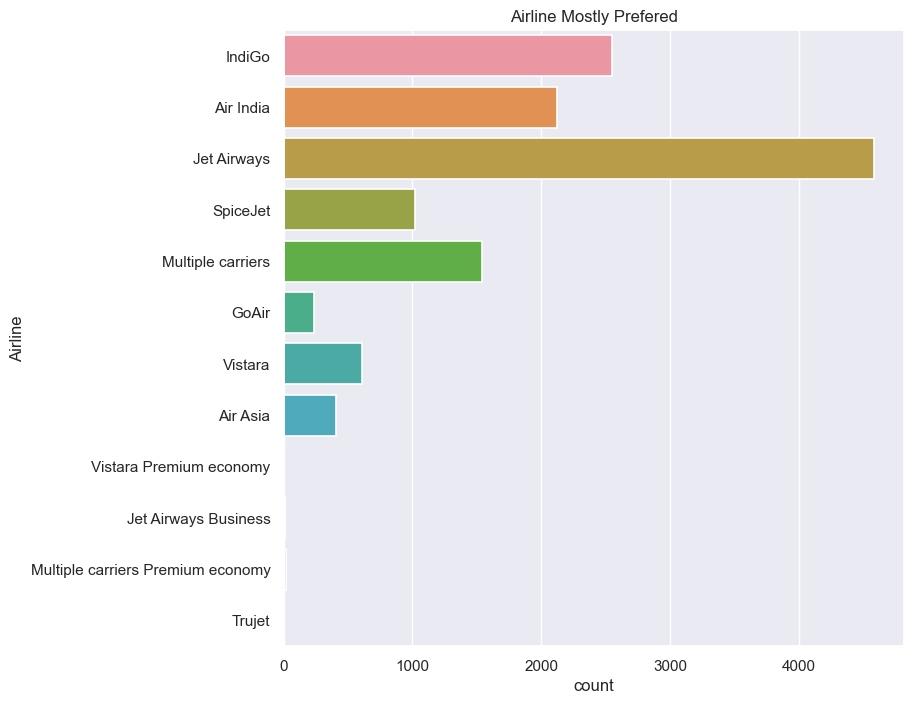

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y=flight_price.Airline,linewidth=1.2)
plt.title('Airline Mostly Prefered')
plt.show()

In [ ]:
# JetAirways is the Mostly preferred Airline

#  Find the majority of the flights take off from which source

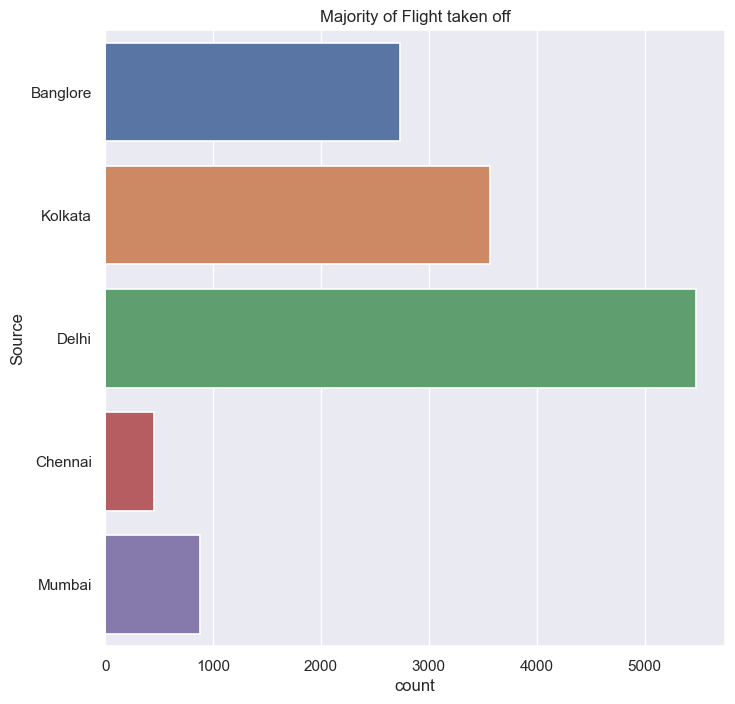

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y=flight_price.Source,linewidth=1.2)
plt.title('Majority of Flight taken off')
plt.show()

In [ ]:
# Delhi is the Source where majrity of Flights have taken off

#  Find maximum flights land in which destination


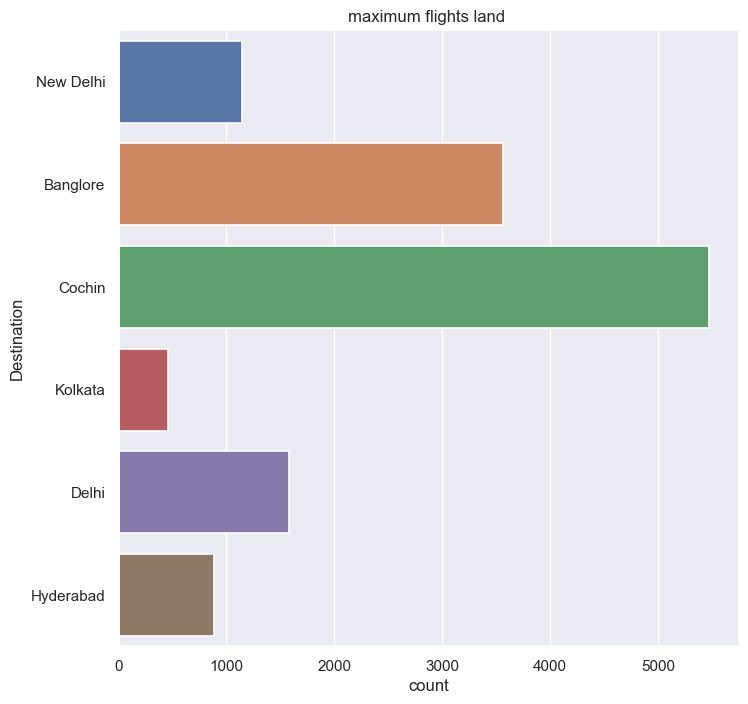

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y=flight_price.Destination,linewidth=1.2)
plt.title('maximum flights land ')
plt.show()

# Compare independent features with Target feature to check the impact on price


 # a) Which airline has the highest price

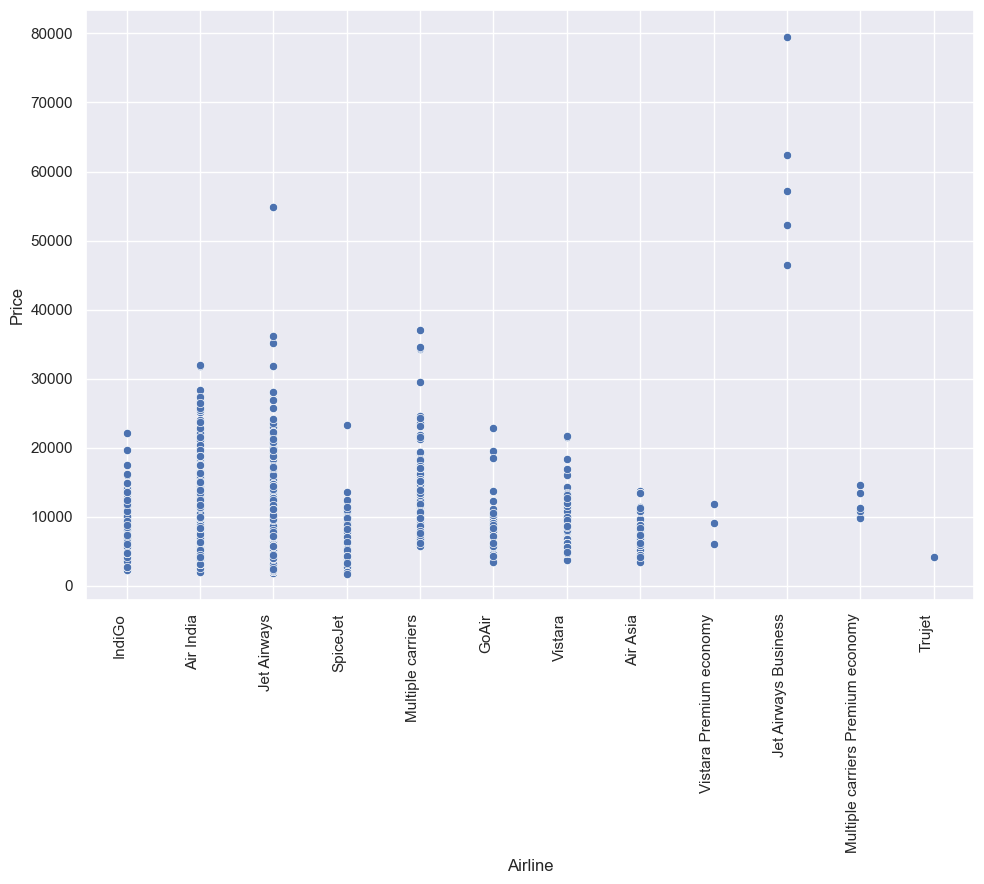

In [ ]:
plt.figure(figsize=(10,9))
ax=sns.scatterplot(x=flight_price.Airline, y=flight_price.Price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.tight_layout()
plt.show()

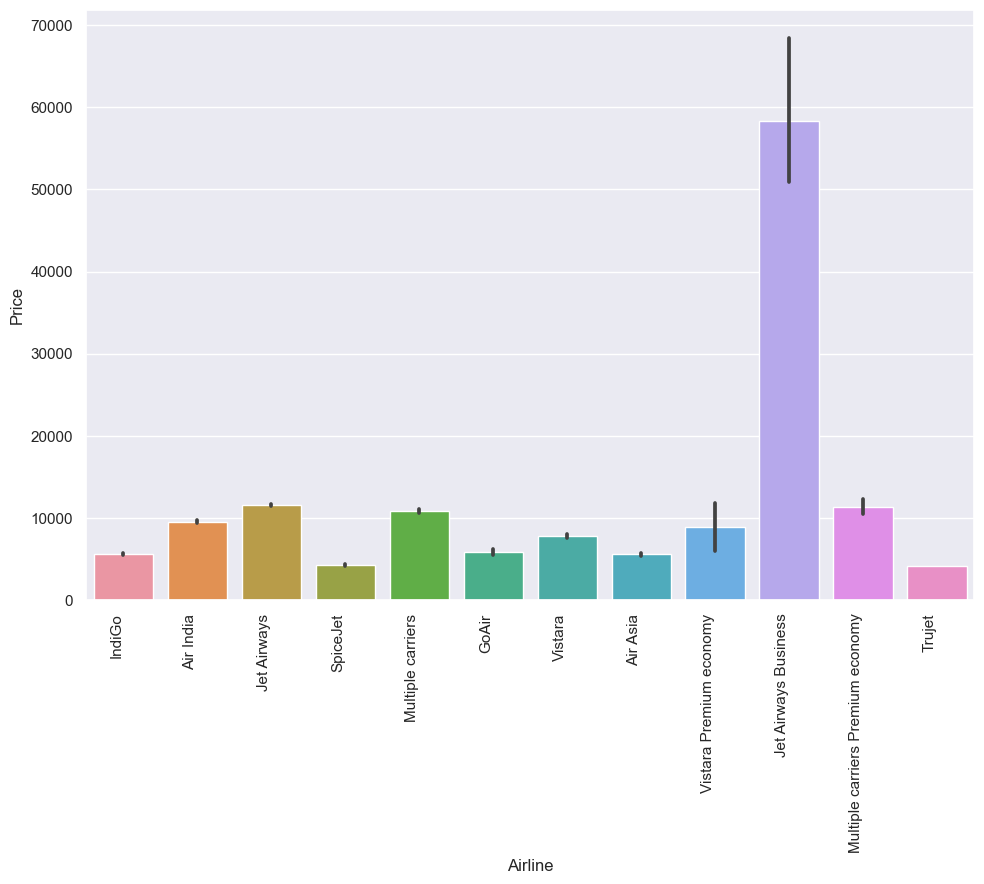

In [ ]:
plt.figure(figsize=(10,9))
ax=sns.barplot(x=flight_price.Airline, y=flight_price.Price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.tight_layout()
plt.show()

 # b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k

In [ ]:
flight_price['Additional_Info'].value_counts()

No info                         10308
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [ ]:
bussiness_c=flight_price[flight_price['Additional_Info']=='Business class']
bussiness_class=bussiness_c[bussiness_c['Price']>50000]
bussiness_class

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data,year,Month,Day
2904,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train,2019,1,3
5312,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427.0,train,2019,1,3
10160,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0,train,2019,1,3


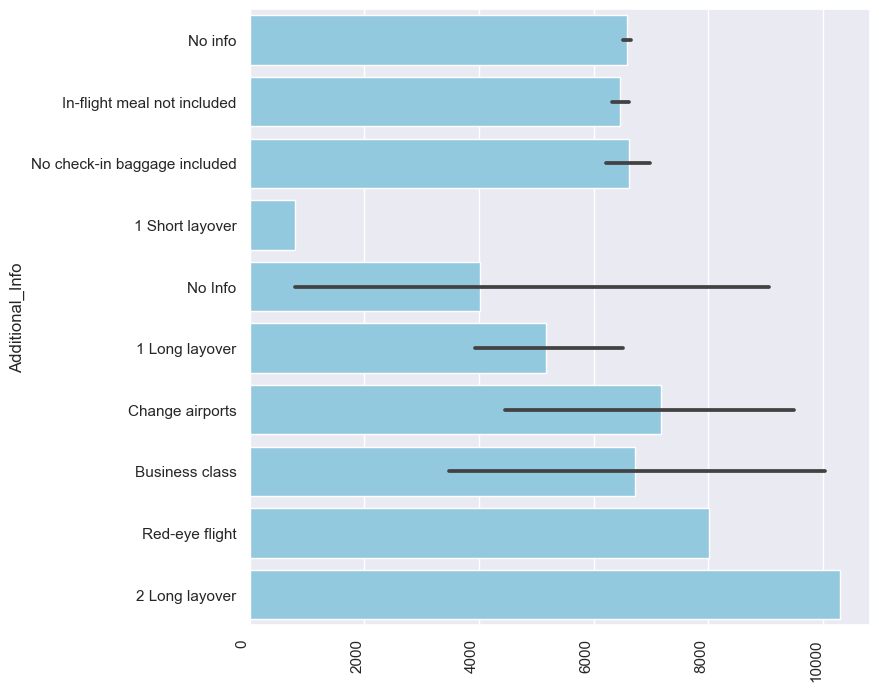

In [ ]:
plt.figure(figsize=(8,8))
bussiness_class_price=flight_price['Additional_Info']
ax=sns.barplot(x=bussiness_class_price.index,y=bussiness_class_price, color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

In [ ]:
#Extracted Minutes from Duration

flight_price['Duration']=flight_price['Duration']/np.timedelta64(1,'m')

In [ ]:
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data,year,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170.0,non-stop,No info,3897.0,train,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445.0,2 stops,No info,7662.0,train,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140.0,2 stops,No info,13882.0,train,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325.0,1 stop,No info,6218.0,train,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285.0,1 stop,No info,13302.0,train,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1435.0,1 stop,No info,NaN,test,2019,6,6
13104,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,155.0,non-stop,No info,NaN,test,2019,3,27
13105,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,395.0,1 stop,No info,NaN,test,2019,6,3
13106,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,915.0,1 stop,No info,NaN,test,2019,6,3


In [ ]:
flight_price['data'].value_counts()

train    10462
test      2645
Name: data, dtype: int64

In [ ]:
flight_price['year'].value_counts()

2019    13107
Name: year, dtype: int64

In [ ]:
flight_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13107 entries, 0 to 13107
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13107 non-null  object        
 1   Date_of_Journey  13107 non-null  datetime64[ns]
 2   Source           13107 non-null  object        
 3   Destination      13107 non-null  object        
 4   Route            13107 non-null  object        
 5   Dep_Time         13107 non-null  object        
 6   Arrival_Time     13107 non-null  object        
 7   Duration         13107 non-null  float64       
 8   Total_Stops      13107 non-null  object        
 9   Additional_Info  13107 non-null  object        
 10  Price            10462 non-null  float64       
 11  data             13107 non-null  object        
 12  year             13107 non-null  int64         
 13  Month            13107 non-null  int64         
 14  Day              13107 non-null  int64

# Encoding


In [ ]:
flight_data=flight_price.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','year','Day'],axis=1)

In [ ]:
flight_data['Airline']=flight_data['Airline'].astype('category')
flight_data['Airline']=flight_data['Airline'].cat.codes

flight_data['Source']=flight_data['Source'].astype('category')
flight_data['Source']=flight_data['Source'].cat.codes

flight_data['Destination']=flight_data['Destination'].astype('category')
flight_data['Destination']=flight_data['Destination'].cat.codes

In [ ]:
flight_data['Total_Stops']=flight_data['Total_Stops'].replace('non-stop',0)

In [ ]:
flight_data['Total_Stops'].value_counts()

1 stop     7052
0          4321
2 stops    1678
3 stops      54
4 stops       2
Name: Total_Stops, dtype: int64

In [ ]:
flight_data['Total_Stops']=flight_data['Total_Stops'].replace('1 stop',1)
flight_data['Total_Stops']=flight_data['Total_Stops'].replace('2 stops',2)
flight_data['Total_Stops']=flight_data['Total_Stops'].replace('3 stops',3)
flight_data['Total_Stops']=flight_data['Total_Stops'].replace('4 stops',4)

In [ ]:
flight_data['Total_Stops'].value_counts()

1    7052
0    4321
2    1678
3      54
4       2
Name: Total_Stops, dtype: int64

In [ ]:
flight_data['Additional_Info'].value_counts()

No info                         10308
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [ ]:
flight_data['Additional_Info']=flight_data['Additional_Info'].replace('No Info','No info')

In [ ]:
# label Encoding
flight_data['Additional_Info']=flight_data['Additional_Info'].astype('category')
flight_data['Additional_Info']=flight_data['Additional_Info'].cat.codes

In [ ]:
flight_data['Additional_Info'].value_counts()

7    10311
5     2366
6      394
0       20
4        8
3        5
1        1
8        1
2        1
Name: Additional_Info, dtype: int64

In [ ]:
flight_data['data'].value_counts()

train    10462
test      2645
Name: data, dtype: int64

In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13107 entries, 0 to 13107
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13107 non-null  int8   
 1   Source           13107 non-null  int8   
 2   Destination      13107 non-null  int8   
 3   Duration         13107 non-null  float64
 4   Total_Stops      13107 non-null  int64  
 5   Additional_Info  13107 non-null  int8   
 6   Price            10462 non-null  float64
 7   data             13107 non-null  object 
 8   Month            13107 non-null  int64  
dtypes: float64(2), int64(2), int8(4), object(1)
memory usage: 665.6+ KB


In [ ]:
flight_data_train=flight_data[flight_data['data']=='train']
flight_data_test=flight_data[flight_data['data']=='test']

In [ ]:
flight_data_test

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,data,Month
10463,4,2,1,655.0,1,7,NaN,test,6
10464,3,3,0,240.0,1,7,NaN,test,12
10465,4,2,1,1425.0,1,5,NaN,test,5
10466,6,2,1,780.0,1,7,NaN,test,5
10467,0,0,2,170.0,0,7,NaN,test,6
...,...,...,...,...,...,...,...,...,...
13103,1,3,0,1435.0,1,7,NaN,test,6
13104,3,3,0,155.0,0,7,NaN,test,3
13105,4,2,1,395.0,1,7,NaN,test,6
13106,1,2,1,915.0,1,7,NaN,test,6


In [ ]:
x=flight_data_train.drop(['Price','data'],axis=1)
y=flight_data_train['Price']

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

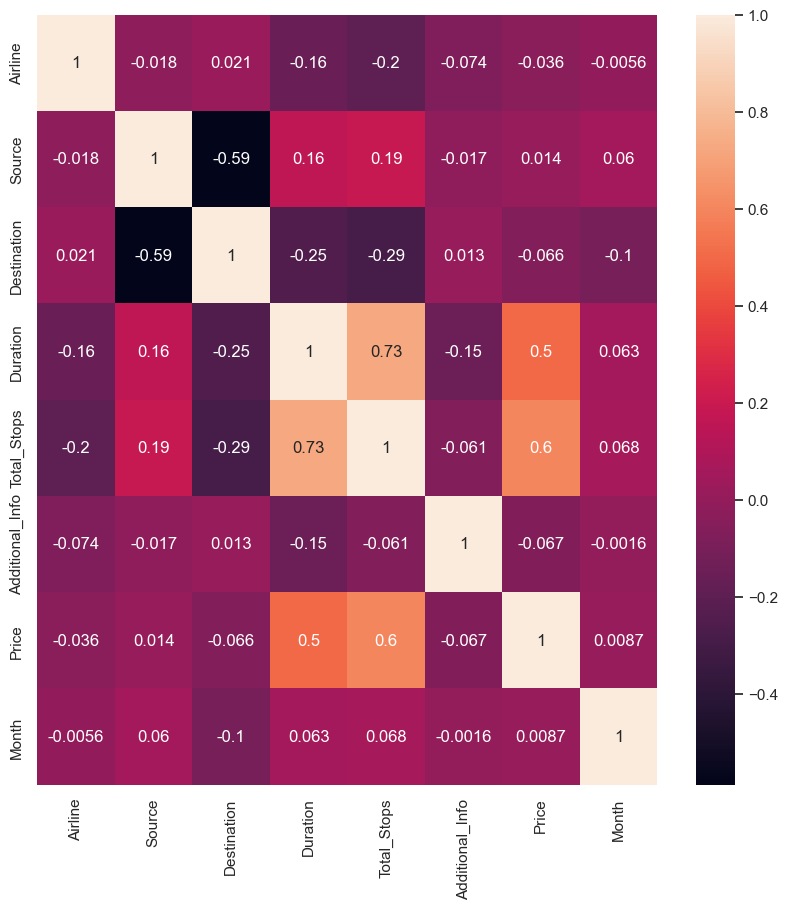

In [ ]:
# Multicollineiarity
plt.figure(figsize=(10,10))
sns.heatmap(flight_data.corr(), annot=True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variance_inflation_factor']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,variance_inflation_factor,features
0,1.051200,Airline
1,1.535409,Source
2,1.631465,Destination
3,2.194291,Duration
4,2.229199,Total_Stops
5,1.039650,Additional_Info
6,1.012492,Month


# Model Building

In [ ]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Building Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print()
print(lr.intercept_)

[ 1.82930086e+02 -2.31841819e+02  2.97959087e+02  1.32311091e+00
  3.89138512e+03 -3.56984291e+01 -3.83338977e+01]

4822.096091160534


In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test))

Training Accuracy : 0.39114389273227923

Test Accuracy : 0.41271564271940586


# Regression with OLS method

In [ ]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [ ]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              7486.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):                        0.00
Time:                        13:41:49   Log-Likelihood:                         -75523.
No. Observations:                7846   AIC:                                  1.511e+05
Df Residuals:                    7839   BIC:                                  1.511e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Airline           248.0221     17.165     14.449      0.000     214.373     281.671
Source            -74.9373     41.661     -1.799      0.072    -156.604       6.729
Destination       446.1364     33.828     13.188      0.000     379.824     512.449
Duration            1.6489      0.120     13.718      0.000       1.413       1.885
Total_Stops      3933.5542     93.786     41.942      0.000    3749.708    4117.400
Additional_Info   506.6348     23.405     21.647      0.000     460.755     552.515
Month              -5.3096     13.684     -0.388      0.698     -32.134      21.515
==============================================================================
Omnibus:                     6127.926   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           415575.197
Skew:                           3.205   Prob(JB):                         0.00
Kurtosis:                      38.073   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

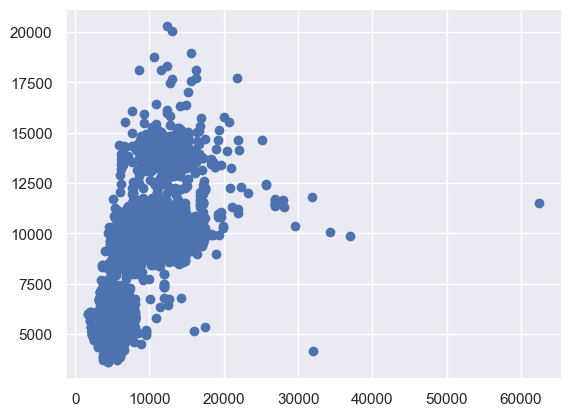

In [ ]:
plt.scatter(y_test, y_pred_test)

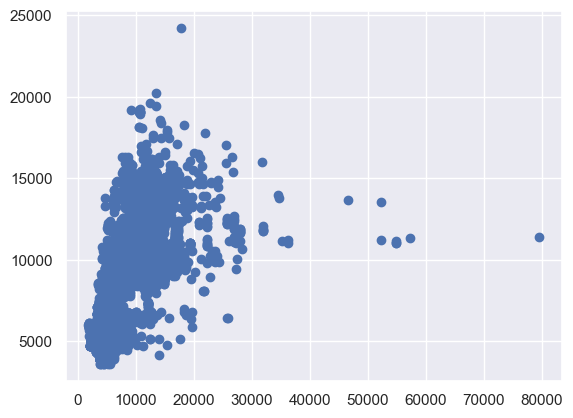

In [ ]:
plt.scatter(y_train, y_pred_train)

<Axes: xlabel='Price', ylabel='Density'>

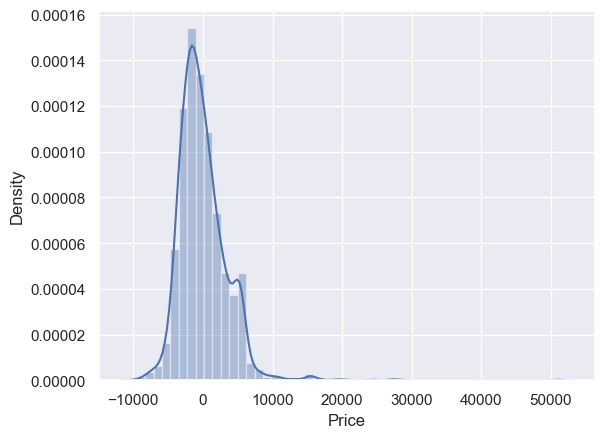

In [ ]:
# check residual should be normally distributed
sns.distplot((y_test - y_pred_test), bins=50)

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE :", metrics.mean_absolute_error(y_test, y_pred_test))
print()
print("MAPE :", metrics.mean_absolute_percentage_error(y_test, y_pred_test)*100)
print()
print("MSE :", metrics.mean_squared_error(y_test, y_pred_test))
print()
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE : 2523.2641848557555

MAPE : 32.95120239516475

MSE : 12110850.254313795

RMSE : 3480.0646911104677


# Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train_dt))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_dt))

Training Accuracy : 0.9264556372896544

Test Accuracy : 0.6527268290438759


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_rf))

Training Accuracy : 0.906595686681281

Test Accuracy : 0.7401784268212588


In [ ]:
from sklearn.model_selection import cross_val_score
test_accuracy=cross_val_score(rf,x_test,y_test,cv=15)
print(test_accuracy.max())

0.8189442729270848


From the above analysis we can conclude that the most preferred airlines are Jet_airways.
The analysis also helped us that most of the flights take-off from Delhi and lands to the destination Cochin.
We have predominantly handled the missing values and made preprocessing on the provided data to build the prediction model.
With the help of EDA we were able to identify which airline has the highest price, i,e. Jet airways Bussiness by both scatter and barplots.
Finally after scaling the data, i was successfully able to build the prediction model and predict the values. with Linear regression model the results were not that accurate, hence i decided to go with descision tree and random forest algorithm. finally with the help of RF algorith , the results were pretty accurate , hence i decided to fit the testing data with
rf model and was successfully able to predict the results.

# Here we prefer the Random Forest Model to predict our Test data

In [ ]:
flight_data_test.drop(['Price','data'],axis=1,inplace=True)

In [ ]:
flight_data_test

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Month
10463,4,2,1,655.0,1,7,6
10464,3,3,0,240.0,1,7,12
10465,4,2,1,1425.0,1,5,5
10466,6,2,1,780.0,1,7,5
10467,0,0,2,170.0,0,7,6
...,...,...,...,...,...,...,...
13103,1,3,0,1435.0,1,7,6
13104,3,3,0,155.0,0,7,3
13105,4,2,1,395.0,1,7,6
13106,1,2,1,915.0,1,7,6


In [ ]:
final_prediction=rf.predict(flight_data_test)

In [ ]:
final_result=pd.DataFrame(final_prediction)

In [ ]:
final_result.rename(columns={0:'Price'},inplace=True)

In [ ]:
final_result

,Price
0,15007.820357
1,4226.000000
2,12628.212500
3,11353.158183
4,4222.260275
...,...
2640,10086.243333
2641,5092.229711
2642,15312.955000
2643,10009.073333


In [ ]:
flight_data_test['Price']=final_result['Price'].values

In [ ]:
flight_data_test

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Month,Price
10463,4,2,1,655.0,1,7,6,15007.820357
10464,3,3,0,240.0,1,7,12,4226.000000
10465,4,2,1,1425.0,1,5,5,12628.212500
10466,6,2,1,780.0,1,7,5,11353.158183
10467,0,0,2,170.0,0,7,6,4222.260275
...,...,...,...,...,...,...,...,...
13103,1,3,0,1435.0,1,7,6,10086.243333
13104,3,3,0,155.0,0,7,3,5092.229711
13105,4,2,1,395.0,1,7,6,15312.955000
13106,1,2,1,915.0,1,7,6,10009.073333


In [ ]:
flight_data_test.to_csv('Flight_Price_Prediction_Tazneen.csv')

# Conclusion

# WE finally predicted the price for our testing data